# Import the necessary libraries

In [2]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn import set_config
set_config(display="diagram")
set_option("display.width", 100)
set_option("display.precision", 3)

# Data Preprocessing

In [3]:
# Load data
df = pd.read_csv('amazon_reviews.csv')
# inspect the dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Ratings,Time,Summary,Text,Score
0,432,B000G6RYNE,A2OEUROGZDTXUJ,J. Graves,0,0,5,1327881600,Delicious!,"Now, I haven't done a side-by-side comparison,...",1
1,809,B0030C9A60,A23WVMQ6J7BZ61,B. Rickerd,0,0,5,1334793600,Delicious!,I bought these chocolate liquor cups for a par...,1
2,1543,B000E7WM0K,AV727S21MQ8IB,Kikitastrophe,0,0,5,1245542400,Delicious!,"This is quick, easy and portable, and I think ...",1
3,1569,B001EU5S9S,A34OUGLMQCXX1U,LTYoung,0,0,5,1321401600,Delicious!,"Love it, love it, love it! Both me and my 10 ...",1
4,1688,B001RVFDOO,AHEBMAD5SIC5B,Jereth,0,0,5,1286841600,Delicious!,I hate healthy anything!<br /><br />But I am o...,1


In [4]:
# Check the class value count 
df["Score"].value_counts()

1    486417
0     82037
Name: Score, dtype: int64

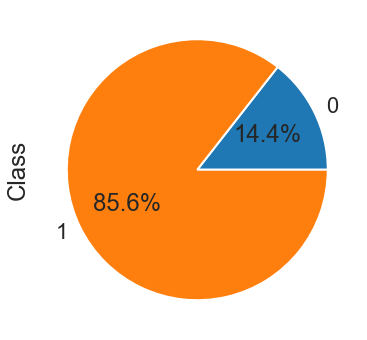

In [5]:
# Visualize the class value count using pie chart
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Score').size().plot(kind ='pie', y='Score', label = 'Class', autopct = '%1.1f%%');

In [6]:
# to create a balanced dataset
#First divide the dataset into two
positive_class = df[df["Score"] == 1]
negative_class = df[df["Score"] == 0]
print(positive_class.shape)
print(negative_class.shape)

(486417, 11)
(82037, 11)


In [7]:
# import the resample library from sklearn 
from sklearn.utils import resample
positive_downsample = resample(positive_class, replace =True, n_samples= len(negative_class), random_state =42)
print(positive_downsample.shape)

(82037, 11)


In [8]:
# concatenate the downsampled positive class dataset with the original negative class
dataset_downsampled = pd.concat([positive_downsample, negative_class])
print(dataset_downsampled['Score'].value_counts())

1    82037
0    82037
Name: Score, dtype: int64


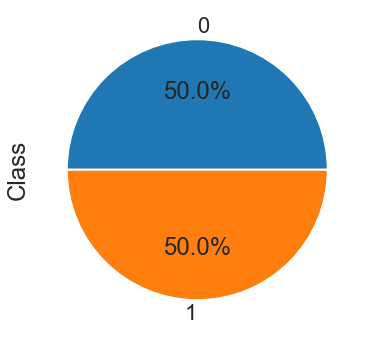

In [9]:
# plot the visuals
dataset_downsampled.groupby('Score').size().plot(kind ='pie', y='Score', label = 'Class', autopct = '%1.1f%%');

In [10]:
dataset_downsampled.shape

(164074, 11)

In [11]:
#reset the index of the scored data
dataset_reviews = dataset_downsampled.reset_index(drop=True)
dataset_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Ratings,Time,Summary,Text,Score
0,360446,B004LI9YAE,ALDAF4VVLFRHP,Patricia L. Brouillette,0,0,5,1333152000,Worth getting,My cats really love these treats. They come ru...,1
1,284030,B0051COPH6,A240FRPD4MEXND,Phyllis Staff,0,0,5,1343606400,Caregivers Alert -- This Product is Good for E...,Wow! I wish I'd known about this baby food wh...,1
2,466446,B000G6O2QG,A2BLJGGWN8GTXQ,Sean,0,0,5,1325721600,Salty and vinegary!!!,These are the strongest tasting salt and vineg...,1
3,484788,B004P7QDQO,A3MOKEX63Y3SEV,Barbara,1,1,5,1315353600,YUMMY!,The thing that caught my eye about this was th...,1
4,299042,B003YV7ZRI,A3RG19S9KKVF44,Anita,0,1,5,1326672000,Best coffee you can buy,"My son-inlaw loves this coffee, but can't buy ...",1


In [12]:
#Save the balanced datasset
#dataset_reviews.to_csv(r'file3.csv')

In [13]:
# Load the new dataset
# Load data
df1 = pd.read_csv('file3.csv')
# inspect the dataset
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Ratings,Time,Summary,Text,Score
0,360446,B004LI9YAE,ALDAF4VVLFRHP,Patricia L. Brouillette,0,0,5,1333152000,Worth getting,My cats really love these treats. They come ru...,1
1,284030,B0051COPH6,A240FRPD4MEXND,Phyllis Staff,0,0,5,1343606400,Caregivers Alert -- This Product is Good for E...,Wow! I wish I'd known about this baby food wh...,1
2,466446,B000G6O2QG,A2BLJGGWN8GTXQ,Sean,0,0,5,1325721600,Salty and vinegary!!!,These are the strongest tasting salt and vineg...,1
3,484788,B004P7QDQO,A3MOKEX63Y3SEV,Barbara,1,1,5,1315353600,YUMMY!,The thing that caught my eye about this was th...,1
4,299042,B003YV7ZRI,A3RG19S9KKVF44,Anita,0,1,5,1326672000,Best coffee you can buy,"My son-inlaw loves this coffee, but can't buy ...",1


# Explore the new dataset

In [14]:
# check the dataset for data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164074 entries, 0 to 164073
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      164074 non-null  int64 
 1   ProductId               164074 non-null  object
 2   UserId                  164074 non-null  object
 3   ProfileName             164066 non-null  object
 4   HelpfulnessNumerator    164074 non-null  int64 
 5   HelpfulnessDenominator  164074 non-null  int64 
 6   Ratings                 164074 non-null  int64 
 7   Time                    164074 non-null  int64 
 8   Summary                 164049 non-null  object
 9   Text                    164074 non-null  object
 10  Score                   164074 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 15.0+ MB


In [15]:
# 0 is negative 
# 1 is positive
df1["Score"].value_counts()

1    82037
0    82037
Name: Score, dtype: int64

In [16]:
# Prepare a subset of dataset
def dataset_reviews(dataframe):
  subset_dataset = dataframe.iloc[:,9:]
  return subset_dataset

In [17]:
dataset = dataset_reviews(df1)
dataset.shape

(164074, 2)

In [18]:
# check the tail of the dataset
dataset.tail()

,Text,Score
164069,We've purchased this water about 5 times and u...,0
164070,I made the mistake of purchasing this bag on A...,0
164071,I bought these for my pregnant wife. They loo...,0
164072,I am not sure why these dried grapes(raisins) ...,0
164073,I suggest you be careful before ordering this ...,0


In [19]:
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [21]:
new_stopwords =["all","due","to","on","daily","get","one","also","even","come","work","really","since","try",
               "think","www","still","well","know","get","say","com","stuff","like","maybe","tried","though","used"]
stop.extend(new_stopwords)

In [22]:
# Data cleaning function
def preprocess(text): 
    text=text.lower()
#specify a regular expression pattern in the first argument, 
#a new string in the second, and a string to be processed in the third.
    text=re.sub('[^0-9a-zA-Z]+',' ',text)    
    text =re.sub(r'#','',text)
    text = re.sub(r'<>\/','',text)
    text = re.sub(r'br br','',text)
    text = re.sub(r'br','',text)
    text = re.sub(r'href','',text)
    text = re.sub(r'href http','',text)
    text = re.sub(r'http','',text)
    text = re.sub(r'httpwww','',text)
    text = text.split()
    text=[w for w in text if (w not in stop)]
    text=' '.join(text)
    text = nlp(text)
    text =[token.lemma_ for token in text]
    text =' '.join(text)
    return text

In [23]:
# clean the review data
dataset['Text'] = dataset['Text'].apply(preprocess)

In [24]:
dataset.tail()

,Text,Score
164069,purchase water 5 time delivery 5 receive new z...,0
164070,make mistake purchase bag amazon subscribe sav...,0
164071,buy pregnant wife look pretty fit nicely purse...,0
164072,sure dry grape raisin label currant one grow e...,0
164073,suggest careful ordering item see cookie worth...,0


In [25]:
#join the reviews
reviews = " ".join(dataset['Text'])
type(reviews)

str

# Visualize the positive and negative  reviews using WordCloud

In [26]:
positive_reviews = dataset[dataset['Score']==1]
positive_reviews

,Text,Score
0,cat love treat run every time grab bag get new...,1
1,wow wish know baby food care mom second stroke...,1
2,strong taste salt vinegar chip could vinegar f...,1
3,thing catch eye word whole grain lack whole gr...,1
4,son inlaw love coffee buy store good place buy...,1
...,...,...
82032,good pumpkin coffee drank could hold fall,1
82033,reading review skeptical decide take chance us...,1
82034,pomegranate licorice twist tasty combination l...,1
82035,else lifesaver ship promptly price cheap buyin...,1


In [27]:
reviews_positive  = " ".join(positive_reviews['Text'])

In [28]:
word_cloud_positive = WordCloud(background_color = "white",stopwords=stopwords.words('english'),width = 800, height = 400,max_words=500,min_word_length=3)
word_cloud_positive.generate(reviews_positive)

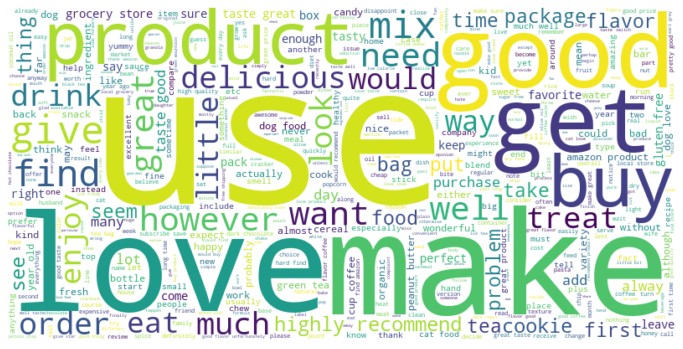

In [29]:
#Display the word cloud
plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(word_cloud_positive, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [30]:
negative_reviews = dataset[dataset['Score']==0]
negative_reviews

,Text,Score
82037,product arrive label jumbo salt peanut peanut ...,0
82038,tea flavor whole unch artifial flavor returnab...,0
82039,candy describe middle almost hard silky smooth...,0
82040,terrible artificial lemon taste pledge lemon f...,0
82041,five minute tentacle bite ball inside crack ha...,0
...,...,...
164069,purchase water 5 time delivery 5 receive new z...,0
164070,make mistake purchase bag amazon subscribe sav...,0
164071,buy pregnant wife look pretty fit nicely purse...,0
164072,sure dry grape raisin label currant one grow e...,0


In [31]:
reviews_negative  = " ".join(negative_reviews['Text'])

In [32]:
word_cloud_negative = WordCloud(background_color = "white",stopwords=stopwords.words('english'),width = 800, height = 400,max_words=500,min_word_length=3)
word_cloud_negative.generate(reviews_negative)


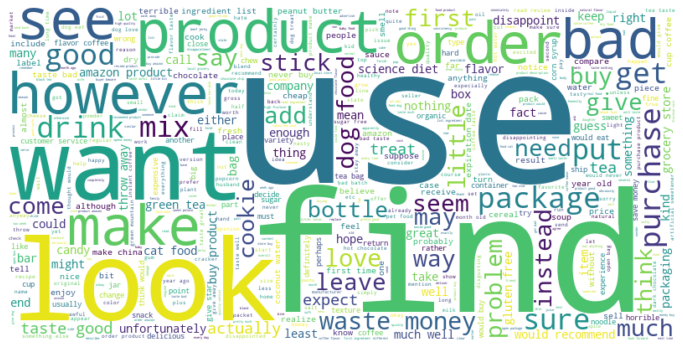

In [33]:
#Display the word cloud
plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(word_cloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Feature Extraction Using TF-IDF

In [34]:
# Specify the word pattern
pattern =r"[a-zA-Z]+"

In [36]:
# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(token_pattern = pattern, stop_words =stop ,max_df=0.5,min_df=5, ngram_range = (1,2),max_features = 500)
vect.fit(dataset['Text'])


TfidfVectorizer(max_df=0.5, max_features=500, min_df=5, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern='[a-zA-Z]+')

In [37]:
#Saving best model 
#import joblib
#Save the model to disk
#filename = 'tfid500_vector_nlp.sav'
#joblib.dump(word_vector, filename)

In [38]:
# Create sparse matrix from the vectorizer
tokenized_features = vect.transform(dataset['Text'])
tokenized_features

<164074x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3010827 stored elements in Compressed Sparse Row format>

In [39]:
#Create a Dataframe of the new features
features = pd.DataFrame(data = tokenized_features.toarray(),columns =vect.get_feature_names_out())
features

,able,absolutely,actually,add,aftertaste,ago,almond,almost,already,alternative,...,wonderful,worth,would,would recommend,write,wrong,year,year old,yes,yet
0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164069,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164070,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.077,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164071,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164072,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Concatenate the new feature dataframe with the initial one
#  and define X and y 
X = features
y = dataset['Score']

In [42]:
X

,able,absolutely,actually,add,aftertaste,ago,almond,almost,already,alternative,...,wonderful,worth,would,would recommend,write,wrong,year,year old,yes,yet
0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164069,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164070,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.077,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164071,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164072,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split the data into Train set and Test set

In [43]:
#Train/test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

(131259, 500)

In [44]:
X_test

,able,absolutely,actually,add,aftertaste,ago,almond,almost,already,alternative,...,wonderful,worth,would,would recommend,write,wrong,year,year old,yes,yet
55281,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0
44091,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0
38501,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0
22400,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0
163757,0.0,0.0,0.083,0.071,0.0,0.0,0.0,0.0,0.104,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106700,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.076,0.0,0.0,0.0,0.000,0.0,0.0,0.0
94131,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0
13366,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0
9514,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.185,0.0,0.0,0.0


# Compare model performance 

In [45]:
# Compare Algorithm
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [46]:
# Build a random forest classifier and fit the model on training set
clf_rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [47]:
#Saving best model 
import joblib
#Save the model to disk
filename = 'amazonclf_500_rfc_nlp.sav'
joblib.dump(clf_rfc, filename)

['amazonclf_500_rfc_nlp.sav']

In [48]:
# Predict on test set
y_pred_rfc = clf_rfc.predict(X_test)
y_pred_rfc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     16543
           1       0.86      0.87      0.87     16272

    accuracy                           0.87     32815
   macro avg       0.87      0.87      0.87     32815
weighted avg       0.87      0.87      0.87     32815



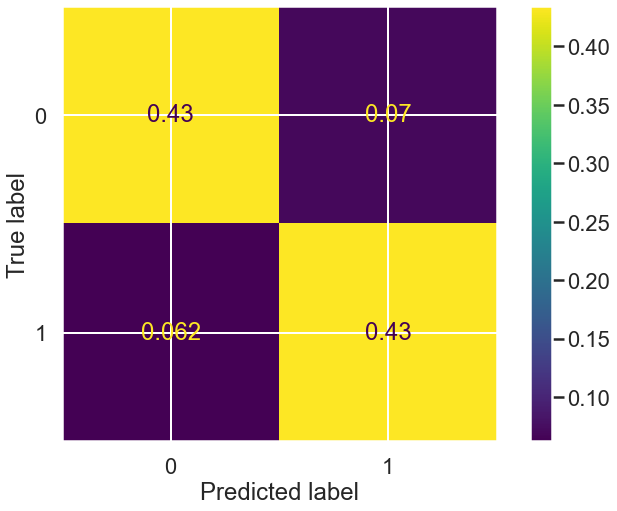

In [49]:
# Evaluate the random forest classifier using confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_rfc,X_test,y_test, normalize ="all")
print(classification_report(y_test,y_pred_rfc))

In [50]:
# Build a decision tree classifier and fit the model on training set
clf_dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [51]:
# Predict on test set
y_pred_dtc = clf_dtc.predict(X_test)
y_pred_dtc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     16543
           1       0.80      0.80      0.80     16272

    accuracy                           0.80     32815
   macro avg       0.80      0.80      0.80     32815
weighted avg       0.80      0.80      0.80     32815



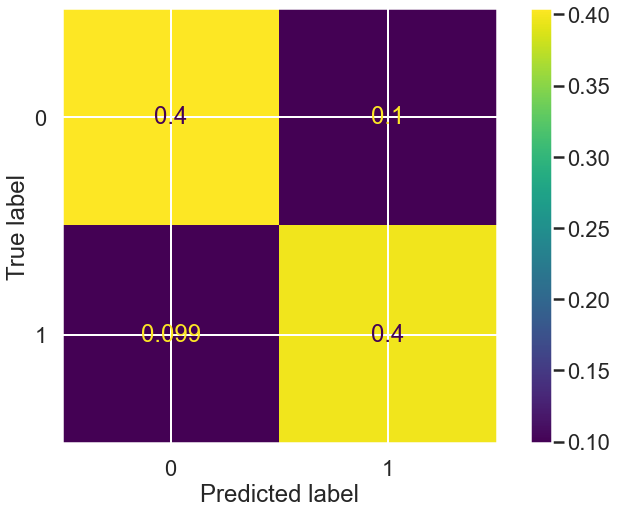

In [52]:
# Evaluate the decision tree classifier using confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_dtc,X_test,y_test, normalize ="all")
print(classification_report(y_test,y_pred_dtc))

In [53]:
# Build a naive bayes classifier and fit the model on training set
clf_nb = MultinomialNB().fit(X_train, y_train)

In [54]:
# Predict on test set
y_pred_nb = clf_nb.predict(X_test)
y_pred_nb

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     16543
           1       0.79      0.81      0.80     16272

    accuracy                           0.80     32815
   macro avg       0.80      0.80      0.80     32815
weighted avg       0.80      0.80      0.80     32815



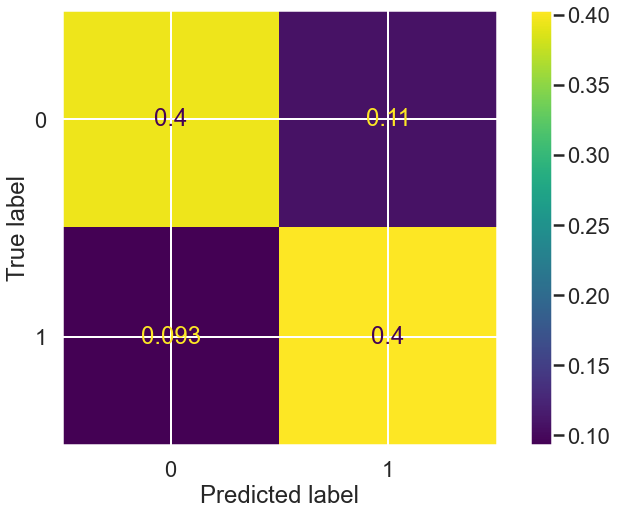

In [55]:
# Evaluate the decision tree classifier using confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_nb,X_test,y_test, normalize ="all")
print(classification_report(y_test,y_pred_nb))

In [56]:
# Build a logisticRegression instance and fit the model on training set
clf_lr = LogisticRegression().fit(X_train, y_train)

In [57]:
# Predict on test set
y_pred_lr = clf_lr.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     16543
           1       0.82      0.81      0.82     16272

    accuracy                           0.82     32815
   macro avg       0.82      0.82      0.82     32815
weighted avg       0.82      0.82      0.82     32815



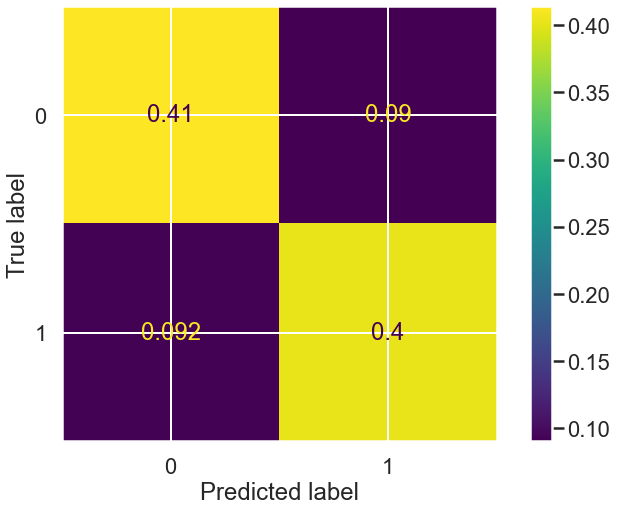

In [58]:
 # Evaluate the gradient boosting classifier using confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_lr,X_test,y_test, normalize ="all")
print(classification_report(y_test,y_pred_lr))


In [59]:
clf_svm = svm.SVC(kernel='linear').fit(X_train, y_train)

In [60]:
# Predict on test set
y_pred_svm = clf_svm.predict(X_test)
y_pred_svm

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     16543
           1       0.82      0.81      0.81     16272

    accuracy                           0.82     32815
   macro avg       0.82      0.82      0.82     32815
weighted avg       0.82      0.82      0.82     32815



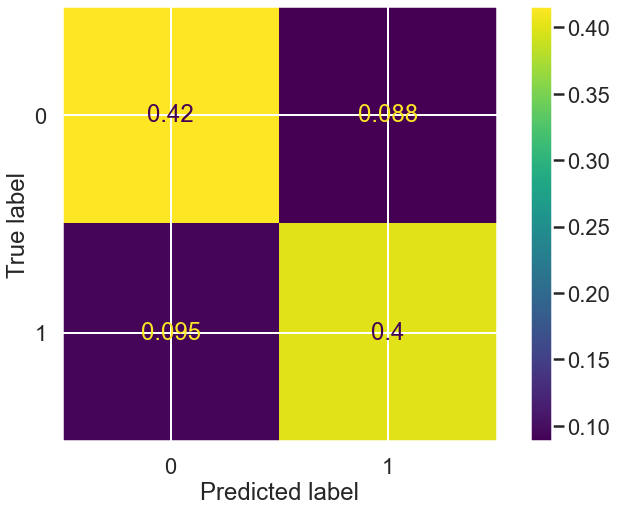

In [61]:
# Evaluate the random forest classifier using confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_svm,X_test,y_test, normalize ="all")
print(classification_report(y_test,y_pred_svm))

# Build and Test the Sentiment Analyzer

In [62]:
# Import the necessary libraries
import nltk
import joblib
import lime
import lime.lime_tabular
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [26]:
# A preprocess function is defined for
# cleaning the data and vectorization
def preprocess(text):
    #nltk.download('stopwords')
    stop = nltk.corpus.stopwords.words('english')
    text=text.lower()
    words = text.split()
    words_list=[w for w in words if (w not in stop)]
    words_clean=' '.join(words_list)
    review = [words_clean]
    vector = joblib.load(r"tfid500_vector_nlp.sav")
    tokenized_features=vector.transform(review)
    features = pd.DataFrame(data = tokenized_features.toarray(),columns = vector.get_feature_names_out())
    return(features)
# This function explains the model's output
def explanation(text):
    vector = joblib.load(r"tfid500_vector_nlp.sav")
    model_rf = joblib.load(r"amazonclf_500_rfc_nlp.sav")
    c = make_pipeline(vector,model_rf)
    class_names=['Negative','Positive']
    explainer = LimeTextExplainer()
    exp = explainer.explain_instance(text, c.predict_proba, num_features=10)
    print(exp.as_list())
    return exp.show_in_notebook()
# Thi function displays the output  
def main():
    text = input('Enter your review here:')
    data_input = preprocess(text)
    model_rf = joblib.load(r"amazonclf_500_rfc_nlp.sav")
    sentiment = model_rf.predict(data_input)
    probability = model_rf.predict_proba(data_input)
    if np.argmax(probability)==0:
        print('This review is negative')
    elif np.argmax(probability)==1:
        print('This review is positive') 
    print(explanation(text))

if __name__ == '__main__':
    main()
    


Enter your review here:The product arrived earlier than expected. But until now, it has not been installed
This review is negative
[('product', -0.07331664087078253), ('installed', -1.105990711962098e-05), ('has', -1.105558746722472e-05), ('than', -1.0261972536718708e-05), ('arrived', -1.0096159291346218e-05), ('earlier', -1.0047701829097133e-05), ('But', -9.362119913706366e-06), ('expected', -9.049294968748013e-06), ('now', -8.262007665497909e-06), ('it', -7.906021390675428e-06)]


None
